# Diamonds Assignment

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

### The Dataset

In [4]:
diamonds = pd.read_csv("./diamonds.csv")
diamonds[:4]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63


## Question 1

The dataset includes almost 54000 diamonds, with five cut classes: Ideal, Premium, Very Good, Good, and Fair. The better the cut the more popular it is in this dataset.

Also included are additional qualitative attributes of the diamonds, such as color and clarity. Most of the diamonds are colorless or near colorless. 

Quantitatively, there is visual correlation between carat and price. 

### Qualitative Attributes

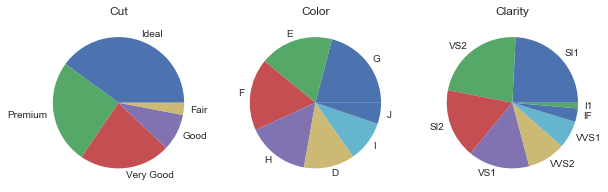

In [14]:
cuts = diamonds['cut'].value_counts()
colors = diamonds['color'].value_counts()
clarities = diamonds['clarity'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,4),subplot_kw={'aspect':'equal'})

axes[0].pie(cuts, labels=(cuts.index))
axes[0].set_title('Cut')
axes[1].pie(colors, labels=(colors.index))
axes[1].set_title('Color')
axes[2].pie(clarities, labels=(clarities.index))
axes[2].set_title('Clarity')

plt.show()

### Quantitative Attributes

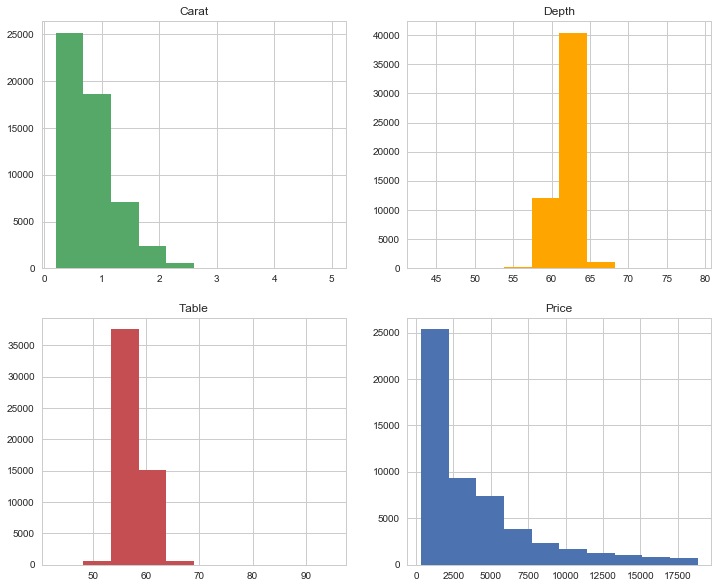

In [33]:
quan_vars = [['carat','depth'],['table','price']]
hist_colors = [['g','orange'],['r','b']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

for x in range(0,2):
    for y in range(0,2):
        axes[x,y].hist(diamonds[quan_vars[x][y]],color=hist_colors[x][y])
        axes[x,y].set_title(quan_vars[x][y].capitalize())
        
plt.show()

## Question 2

For a single cut, you could use a single histogram or boxplot to show the distribution of price, like any single quantitative variable.

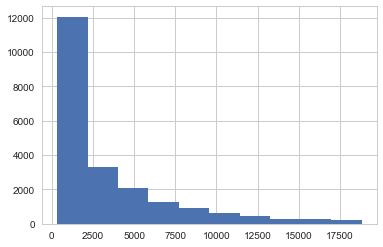

In [7]:
diamonds.loc[diamonds['cut']=='Ideal']
thingy = plt.hist(diamonds.loc[diamonds['cut']=='Ideal']['price'])

## Questions 3 and 4

To see the distribution of price per cut, a bad option is to show histograms for each. 

You could line up side by side swarmplots, but the data points are so dense nothing can be inferred from the visualization. Side by side boxplots show the distribution, and side by side violinplots are even better. Still, this doesn't properly convey how many diamonds belong to each cut. You could also use a stacked histogram with colors corresponding to cut, but this breaks down at 3 or 4 histograms. 

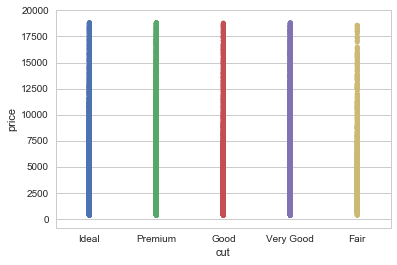

In [9]:
sns.stripplot(x="cut", y="price", data=diamonds);

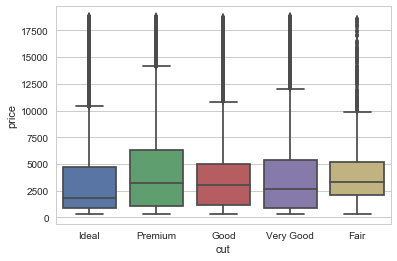

In [16]:
sns.boxplot(x="cut", y="price", data=diamonds)
plt.show()

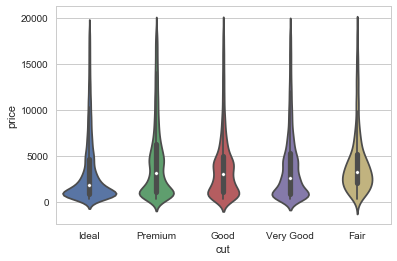

In [17]:
sns.violinplot(x="cut", y="price", data=diamonds)
plt.show()

## Question 5

We would probably expect better cuts to have higher prices, but this plot shows that for the most part, prices are actually higher the worse the cut is. This leads us to search for a confounding variable later.

## Question 6

The two worst clarities have a significant fraction with high prices. The second best clarity also does, but the best and all of the middle clarities are clustered around low prices. Again, this is unintuitive.

## Questions 7 and 8

A scatterplot showing price versus carat shows a clear correlation. This is intuitive because, while quality matters, quantity matters more. The important realization is that bigger diamonds are likely to be lower quality - perhaps because lower quality diamonds are more common overall or because in refining and cutting a diamond to a higher quality, more material is lost.

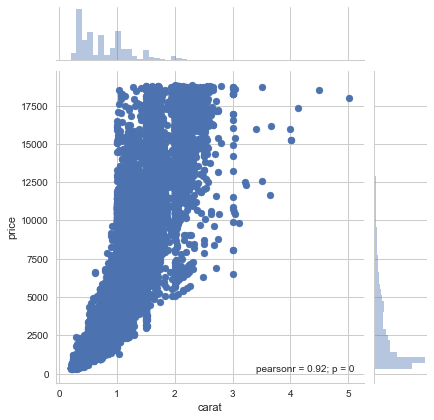

In [29]:
sns.jointplot(x="carat", y="price", data=diamonds);